<a href="https://colab.research.google.com/github/jimmymanianchira/FastAi_NLP/blob/master/Review_cv_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate

## This notebook is notebook which reviews transfer learning in computer vision part of FastAI-NLP course

In [0]:

bs = 64
# bs = 16 

In [3]:

path = untar_data(URLs.PETS)
path_anno = path/'annotations'
path_img = path/'images'
np.random.seed(2)
fnames = get_image_files(path_img)
fnames[0]

PosixPath('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_35.jpg')

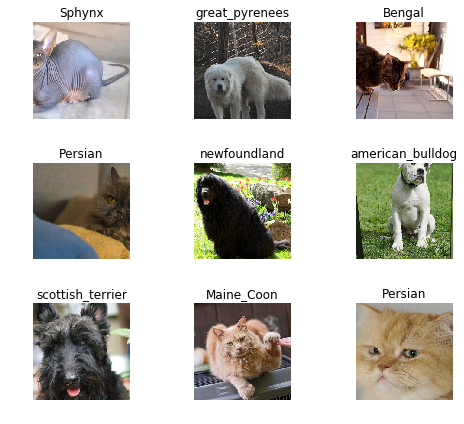

In [4]:
pat = r'/([^/]+)_\d+.jpg$'
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)
data.show_batch(rows=3, figsize=(7,6))

In [6]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 156862766.05it/s]


In [0]:
??cnn_learner

In [7]:
learn.fit_one_cycle(4)


epoch,train_loss,valid_loss,error_rate,time
0,1.373097,0.336403,0.107578,01:27
1,0.549757,0.256838,0.089310,01:27
2,0.342216,0.225159,0.068336,01:27
3,0.260024,0.217362,0.071719,01:26


In [0]:

learn.save('stage-1')

In [9]:

learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.233210,0.211212,0.071719,01:28
1,0.203194,0.207430,0.068336,01:27


In [10]:

interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused(min_val=2)

[('Ragdoll', 'Birman', 6),
 ('american_pit_bull_terrier', 'american_bulldog', 6),
 ('Bengal', 'Egyptian_Mau', 5),
 ('staffordshire_bull_terrier', 'american_bulldog', 5),
 ('Birman', 'Ragdoll', 4),
 ('British_Shorthair', 'Russian_Blue', 4),
 ('Egyptian_Mau', 'Bengal', 4),
 ('chihuahua', 'miniature_pinscher', 4),
 ('Abyssinian', 'Sphynx', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('beagle', 'basset_hound', 2),
 ('boxer', 'american_bulldog', 2),
 ('english_cocker_spaniel', 'newfoundland', 2),
 ('keeshond', 'leonberger', 2),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 2),
 ('yorkshire_terrier', 'havanese', 2)]